# Mamdani

In [3]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=1dd20641e686e0f1e131cc534393d23b4a0d455db00653b758203a97ab2762a4
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Import Library

In [ ]:
import numpy as np
import skfuzzy as skf
from skfuzzy import control as ctrl

Batas Data Inputan

In [ ]:
temperature = ctrl.Antecedent(np.arange(20, 81, 1), 'temperature')
smoke = ctrl.Antecedent(np.arange(0, 1001, 1), 'smoke')
fire = ctrl.Antecedent(np.arange(0, 1001, 1), 'fire')
pump_speed = ctrl.Consequent(np.arange(0, 241, 1), 'pump_speed')

Grafik Temperature

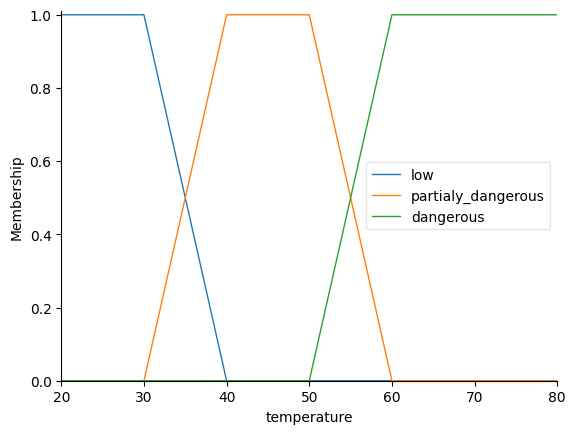

In [ ]:
temperature['low'] = skf.trapmf(temperature.universe, [20, 20, 30, 40])
temperature['partialy_dangerous'] = skf.trapmf(temperature.universe, [30, 40, 50, 60])
temperature['dangerous'] = skf.trapmf(temperature.universe, [50, 60, 80, 80])

temperature.view()

Grafik Smoke

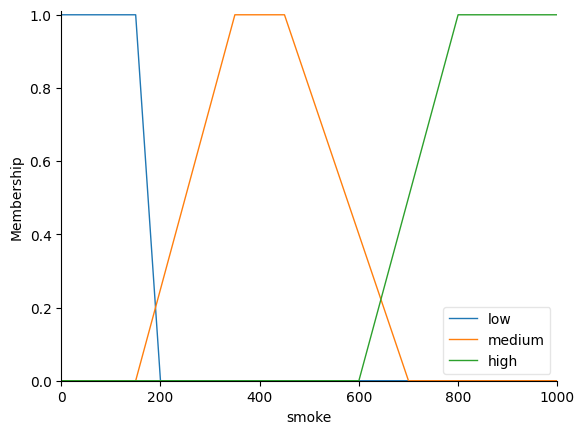

In [ ]:
smoke['low'] = skf.trapmf(smoke.universe, [0, 0, 150, 200])
smoke['medium'] = skf.trapmf(smoke.universe, [150, 350, 450, 700])
smoke['high'] = skf.trapmf(smoke.universe, [600, 800, 1000, 1000])

smoke.view()

Grafik Fire

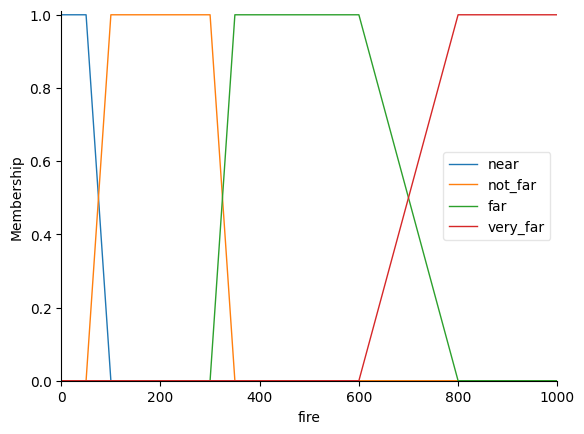

In [ ]:
fire['near'] = skf.trapmf(fire.universe, [0, 0, 50, 100])
fire['not_far'] = skf.trapmf(fire.universe, [50, 100, 300, 350])
fire['far'] = skf.trapmf(fire.universe, [300, 350, 600,800])
fire['very_far'] = skf.trapmf(fire.universe, [600, 800, 1000, 1000])

fire.view()

Grafik PumpSpeed

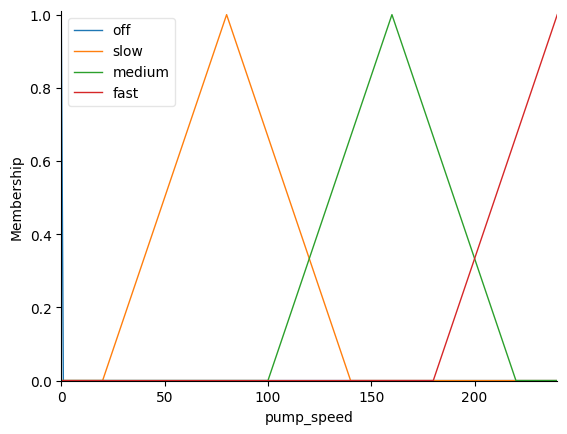

In [ ]:
pump_speed['off'] = skf.trimf(pump_speed.universe, [0, 0, 0])
pump_speed['slow'] = skf.trimf(pump_speed.universe, [20, 80, 140])
pump_speed['medium'] = skf.trimf(pump_speed.universe, [100, 160, 220])
pump_speed['fast'] = skf.trapmf(pump_speed.universe, [180, 240, 240, 240])

pump_speed.view()

Aturan Aturan

In [ ]:
rules = [
    # temperature dangerous
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['very_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature partialy dangerous
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

      # temperature low
    ctrl.Rule(temperature['low'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['low'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['low'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['low'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['low'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['low'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['low'] & smoke['low'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['low'] & smoke['medium'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['low'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['low'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['low'] & smoke['medium'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['low'] & smoke['high'] & fire['near'], pump_speed['medium'])
]

Input Data X & Hasil

In [ ]:
control_system = ctrl.ControlSystem(rules)

input_temperature = 40
input_fire = 50
input_smoke = 700

# Simulate the system
simulation = ctrl.ControlSystemSimulation(control_system)
simulation.input['temperature'] = input_temperature
simulation.input['smoke'] = input_smoke
simulation.input['fire'] = input_fire

simulation.compute()

# print(simulation.output['pump_speed'])

output_action = simulation.output['pump_speed']
print(output_action)
# output_action_value = skf.defuzz(pump_speed.universe, output_action, 'centroid')

216.66666666666666


Visualisasi

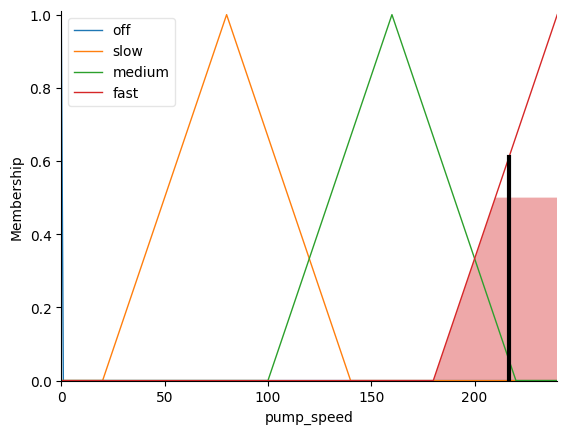

In [ ]:
pump_speed.view(sim=simulation)

# Tsukamoto

Import Library

In [4]:
import numpy as np
import skfuzzy as skf
from skfuzzy import control as ctrl

Batas Data Inputan

In [5]:
temperature = ctrl.Antecedent(np.arange(20, 81, 1), 'temperature')
smoke = ctrl.Antecedent(np.arange(0, 1001, 1), 'smoke')
fire = ctrl.Antecedent(np.arange(0, 1001, 1), 'fire')
pump_speed = ctrl.Consequent(np.arange(0, 241, 1), 'pump_speed')

Grafik Temperature

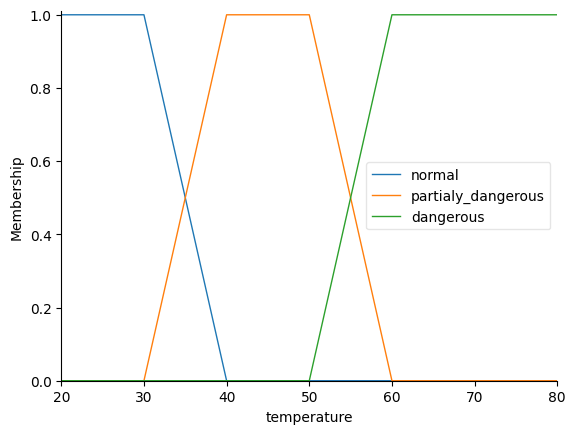

In [6]:
temperature['normal'] = skf.trapmf(temperature.universe, [20, 20, 30, 40])
temperature['partialy_dangerous'] = skf.trapmf(temperature.universe, [30, 40, 50, 60])
temperature['dangerous'] = skf.trapmf(temperature.universe, [50, 60, 80, 80])

temperature.view()

Grafik Smoke

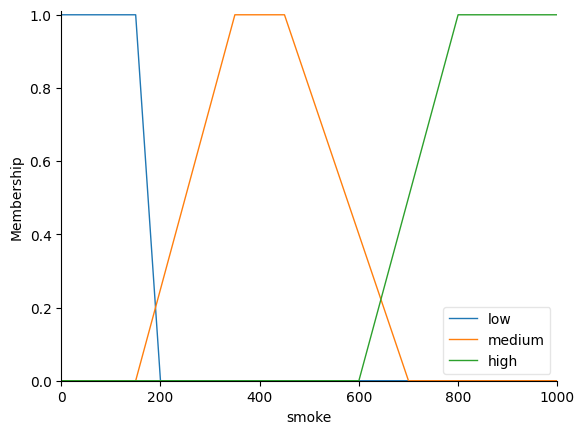

In [7]:
smoke['low'] = skf.trapmf(smoke.universe, [0, 0, 150, 200])
smoke['medium'] = skf.trapmf(smoke.universe, [150, 350, 450, 700])
smoke['high'] = skf.trapmf(smoke.universe, [600, 800, 1000, 1000])

smoke.view()

Grafik Fire

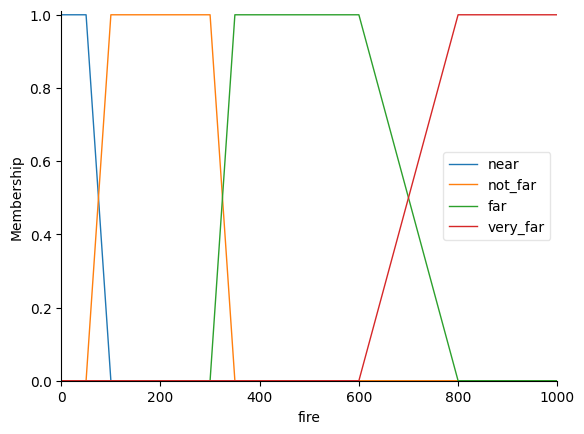

In [8]:
fire['near'] = skf.trapmf(fire.universe, [0, 0, 50, 100])
fire['not_far'] = skf.trapmf(fire.universe, [50, 100, 300, 350])
fire['far'] = skf.trapmf(fire.universe, [300, 350, 600,800])
fire['very_far'] = skf.trapmf(fire.universe, [600, 800, 1000, 1000])

fire.view()

Grafik PumpSpeed

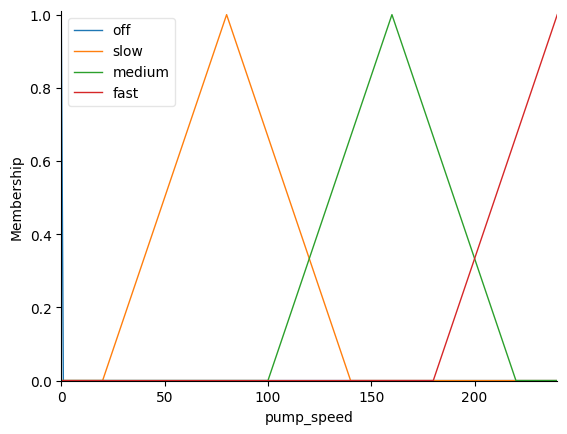

In [9]:
pump_speed['off'] = skf.trimf(pump_speed.universe, [0, 0, 0])
pump_speed['slow'] = skf.trimf(pump_speed.universe, [20, 80, 140])
pump_speed['medium'] = skf.trimf(pump_speed.universe, [100, 160, 220])
pump_speed['fast'] = skf.trapmf(pump_speed.universe, [180, 240, 240, 240])

pump_speed.view()

Aturan Aturan

In [10]:
rules = [
    # temperature dangerous
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['very_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature partialy dangerous
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature medium
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['near'], pump_speed['medium'])
]

Inferensi

In [11]:
def inferences(storage=[], temp=0, smk=0, fr=0):
    temperature_inf = storage.copy()
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['dangerous'].mf, temp))
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['partialy_dangerous'].mf, temp))
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['normal'].mf, temp))

    smoke_inf = storage.copy()
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['low'].mf, smk))
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['medium'].mf, smk))
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['high'].mf, smk))

    fire_inf = storage.copy()
    fire_inf.append(skf.interp_membership(fire.universe, fire['very_far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['not_far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['near'].mf, fr))

    return [temperature_inf, smoke_inf, fire_inf]

Fuzzyfikasi

In [12]:
def z_slow(a_pred):
    z1 = (a_pred * (80-20)) + 20
    z2 = 140 - (a_pred*(140-80))
    return z1, z2

def z_medium(a_pred):
    z1 = (a_pred * (160-100)) + 100
    z2 = 220 - (a_pred*(220-160))
    return z1, z2

def z_fast(a_pred):
    z1 = (a_pred * (240-180)) + 180
    return z1

Input Data X

In [19]:
input_temperature = 40
input_fire = 50
input_smoke = 700

Defuzzyfikasi

In [21]:
from itertools import product

def tsukamoto(input_temperature, input_smoke, input_fire):
    inference = inferences(temp=input_temperature, smk=input_smoke, fr=input_fire)

    rule_inferences = [list(combination) for combination in product(*inference)]

    a_val = []
    z_val = []
    for idx, ri in enumerate(rule_inferences):
        a_pred = min(ri)
        if a_pred > 0:
            if 'pump_speed[off]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z_val.append(0)
            if 'pump_speed[slow]' in str(rules[idx].consequent):
                a_val.append(a_pred*2)
                z1, z2 = z_slow(a_pred)
                z_val.append(z1*a_pred)
                z_val.append(z2*a_pred)
            if 'pump_speed[medium]' in str(rules[idx].consequent):
                a_val.append(a_pred*2)
                z1, z2 = z_medium(a_pred)
                z_val.append(z1*a_pred)
                z_val.append(z2*a_pred)
            if 'pump_speed[fast]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z1 = z_fast(a_pred)
                z_val.append(z1*a_pred)
    output_action = sum(z_val)/sum(a_val)
    return output_action

output_action =  tsukamoto(input_temperature=input_temperature, input_smoke=input_smoke, input_fire=input_fire)
print(f'Water Pump Speed Output: {output_action} m/s')

Water Pump Speed Output: 210.0 m/s


Visualisasi

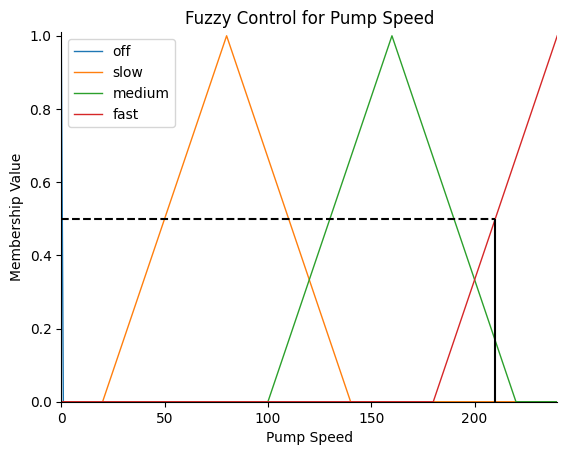

In [22]:
import matplotlib.pyplot as plt

def visualize(output_action):
    pump_speed.view()

    m_value = skf.interp_membership(pump_speed.universe, pump_speed['medium'].mf, output_action)
    m_value1 = skf.interp_membership(pump_speed.universe, pump_speed['slow'].mf, output_action)
    m_value2 = skf.interp_membership(pump_speed.universe, pump_speed['fast'].mf, output_action)
    m = max(m_value, m_value1, m_value2)
    plt.vlines(output_action, 0, m, colors='black')
    plt.hlines(m, 0, output_action, colors='black', linestyles='dashed')

    plt.xlabel("Pump Speed")
    plt.ylabel("Membership Value")
    plt.title("Fuzzy Control for Pump Speed")
    plt.legend()

    file_path = f'D:/Code/py_code/Fuzzy-Logic/tsukamoto_output/{output_action:.1f}.png'
    # plt.savefig(file_path)
    # return file_path

    plt.show()

visualize(output_action)

In [ ]:
import pandas as pd

input_data = pd.read_excel('D:/Code/py_code/Fuzzy-Logic/input-data.xlsx', sheet_name='Input')
input_data

In [ ]:
def process_data(input_data):
    output_data = []
    for row in range(input_data.shape[0]):
        input_temperature = input_data['Temperature'][row]
        input_smoke = input_data['Smoke'][row]
        input_fire = input_data['Fire'][row]
        output_action =  tsukamoto(input_temperature=input_temperature, input_smoke=input_smoke, input_fire=input_fire)

        output_data.append([input_temperature, input_smoke, input_fire, output_action])

    return pd.DataFrame(output_data, columns=['Temperature', 'Smoke', 'Fire', 'Output'])

In [ ]:
output_data = process_data(input_data)
output_data.to_excel('tsukamoto.xlsx', sheet_name='tsukamoto', index=False)

In [ ]:
import pandas as pd

excel_files = ['input-data.xlsx', 'tsukamoto.xlsx', 'mamdani.xlsx']

with pd.ExcelWriter('output-data.xlsx') as writer:
    for file in excel_files:
        df = pd.read_excel(file)
        sheet_name = file.split('.')[0]

        df.to_excel(writer, sheet_name=sheet_name, index=False)

output = pd.read_excel('D:/Code/py_code/Fuzzy-Logic/output-data.xlsx', sheet_name='tsukamoto')
output